In [1]:
#import all libraries
import os
import cv2
import random
from imutils import paths

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#set random seed for reproducibility
random.seed(42)

In [4]:
# Initialize lists to hold image data and labels
data=[]
labels=[]


# Get a sorted list of image paths
image_path=sorted(list(paths.list_images('Data_set')))

# Shuffle the image path
random.shuffle(image_path)

for path in image_path:
    image=cv2.imread(path)
    image=cv2.resize(image,(64,64))
    data.append(image)
    
# Extract label from the path    
    label=path.split(os.path.sep)[-2]
    labels.append(label)
    
data=np.array(data,dtype='float')/255
labels=np.array(labels)

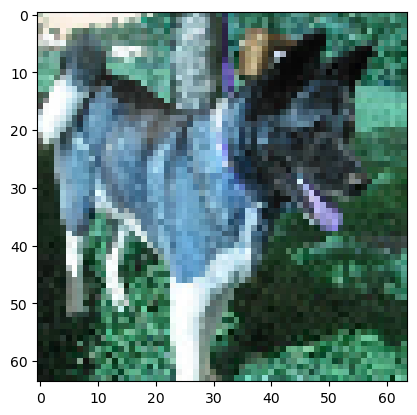

In [5]:
plt.imshow(data[98])

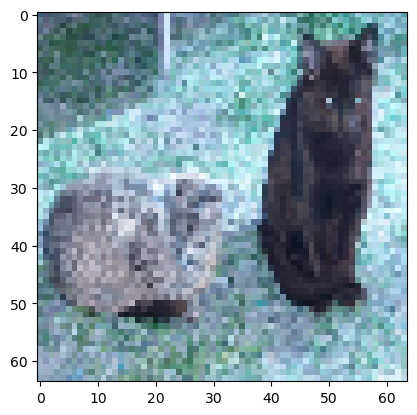

In [6]:
plt.imshow(data[10])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [8]:
def check_shape(df):
    print(df.shape)

In [9]:
print('x_training_shape')
check_shape(x_train)
print('x_test_shape')
check_shape(x_test)
print('Y_training_shape')
check_shape(y_train)
print('Y_test_shape')
check_shape(y_test)

x_training_shape
(153, 64, 64, 3)
x_test_shape
(39, 64, 64, 3)
Y_training_shape
(153,)
Y_test_shape
(39,)


In [10]:
# Define the CNN Model
cnn= tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,activation='relu',input_shape=(64,64,3),strides=(2,2),kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(60,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(90,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
opti= 'adam'
loss='binary_crossentropy'
metrics= ['accuracy']
epoch=25
batch_size=32

In [12]:
cnn.compile(optimizer=opti,loss=loss,metrics=metrics)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le= LabelEncoder()

In [15]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [18]:
# Train the model
hist= cnn.fit(x_train,y_train,epochs=epoch,validation_data=(x_test,y_test),batch_size=batch_size)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.4720 - loss: 0.6996 - val_accuracy: 0.5385 - val_loss: 0.6829
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5059 - loss: 0.6926 - val_accuracy: 0.5385 - val_loss: 0.6879
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6145 - loss: 0.6790 - val_accuracy: 0.6410 - val_loss: 0.6705
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6979 - loss: 0.6688 - val_accuracy: 0.7179 - val_loss: 0.6548
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8066 - loss: 0.6377 - val_accuracy: 0.7692 - val_loss: 0.6213
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6736 - loss: 0.6137 - val_accuracy: 0.7949 - val_loss: 0.5933
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7253 - loss: 0.5720 - val_accuracy: 0.7949 - val_loss: 0.5505
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8301 - loss: 0.5146 - val_accuracy: 0.7949 - val_loss: 0.4781

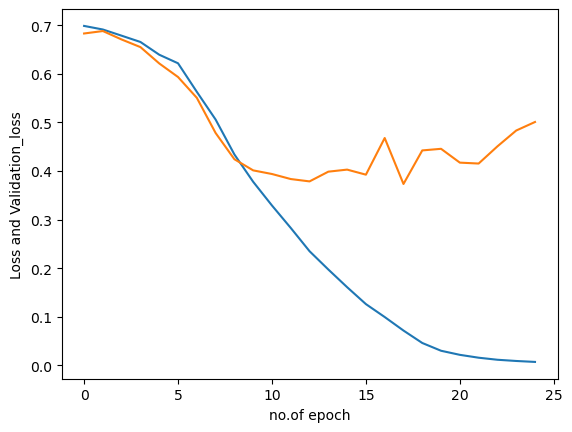

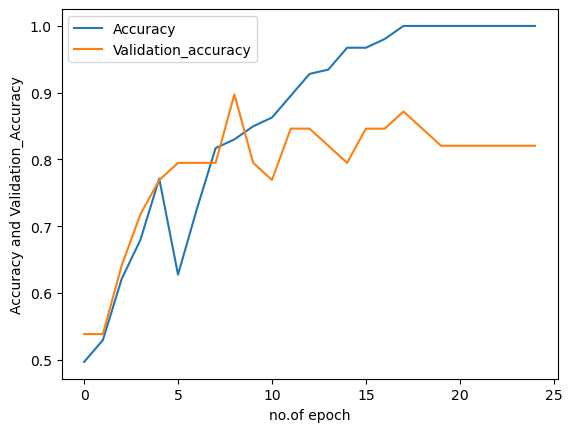

In [19]:
N= np.arange(0,epoch)

plt.figure()
plt.plot(N,hist.history['loss'],label='Loss')
plt.plot(N,hist.history['val_loss'],label='Validation_Loss')
plt.xlabel('no.of epoch')
plt.ylabel('Loss and Validation_loss')

plt.figure()
plt.plot(N,hist.history['accuracy'],label='Accuracy')
plt.plot(N,hist.history['val_accuracy'],label='Validation_accuracy')
plt.xlabel('no.of epoch')
plt.ylabel('Accuracy and Validation_Accuracy')
plt.legend();
plt.legend();

In [21]:
x_test.shape

(39, 64, 64, 3)

In [22]:
preds= np.round(cnn.predict(x_test),0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
classification= classification_report(preds,y_test)
print(classification)

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        19
         1.0       0.81      0.85      0.83        20

    accuracy                           0.82        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.82      0.82      0.82        39



In [25]:
confusion= confusion_matrix(preds,y_test)
print(confusion)

[[15  4]
 [ 3 17]]


In [27]:
image= cv2.imread("dog_image.webp")
image= cv2.resize(image,(64,64))

In [29]:
x_test.shape

(39, 64, 64, 3)

In [30]:
image.shape

(64, 64, 3)

In [31]:
image= image.reshape(1,64,64,3)

In [32]:
image.shape

(1, 64, 64, 3)

In [33]:
preds= np.round(cnn.predict(image),0)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[0.]], dtype=float32)